In [1]:
import ROOT
ROOT.gStyle.SetOptStat(0)
f = ROOT.TFile("/Users/dstocks/work/MCParticleDistributions.root", "READ")

Welcome to JupyROOT 6.12/06


In [2]:
t = f.Get("MCParticles")

Here, I create dictionaries that hold the histograms and canvases for each type of particle in "particles" that will display their leading momenta moduli and energies. I also create the lists "max_overall_P" and "max_overall_E" which hold the overall max value for P or E in a single event, which will be shown in two separate histograms.

Note that I initialize the values of the keys in max_particle_P and max_particle_E to be empty lists to fill later on.

In [3]:
particles = ['Proton', 'Neutron', 'Pion', 'Pi0', 'Meson', 'Baryon']
hN_P = {}
cN_P = {}
hN_E = {}
cN_E = {}
max_particle_P = {}
max_particle_E = {}
max_overall_P = []
max_overall_E = []
for i in particles:
    max_particle_P[i] = []
    max_particle_E[i] = []

I begin by looping over the events and creating a variable to hold the leading P and leading E for each event (over all types of particles). Then I loop over each particle type in "particles" and define variables to hold the leading P and leading E for that specific type of particle. Then I cycle through the appropriate values and find the true leading P and leading E for all the types of particles and for all particles in general (cross-comparison).

In [4]:
for i in t:
    leading_P = 0
    leading_E = 0
    for j in particles:
        leading_particle_P = 0
        leading_particle_E = 0
        P_arg = "i.%sP" % j
        E_arg = "i.%sE" % j
        for k in eval(P_arg):
            if abs(k) > leading_particle_P:
                leading_particle_P = k
        for l in eval(E_arg):
            if abs(l) > leading_particle_E:
                leading_particle_E = l
        max_particle_P[j].append(leading_particle_P)
        max_particle_E[j].append(leading_particle_E)
        
        if leading_particle_P > leading_P:
            leading_P = leading_particle_P
        if leading_particle_E > leading_E:
            leading_E = leading_particle_E
    max_overall_P.append(leading_P)
    max_overall_E.append(leading_E)

Graph the leading momenta moduli for each particle type.

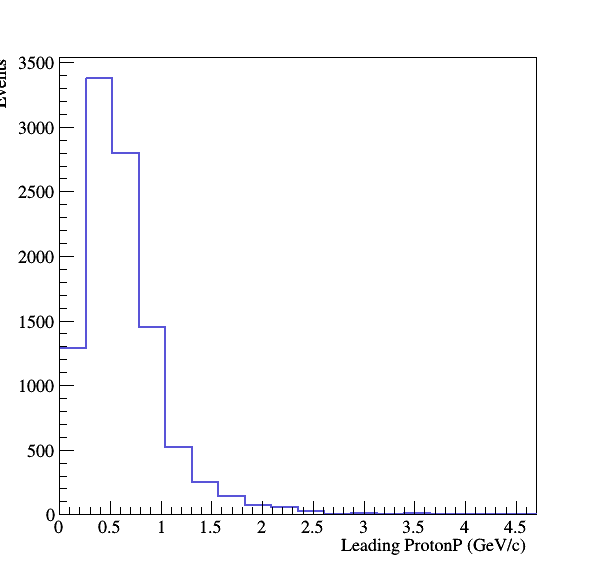

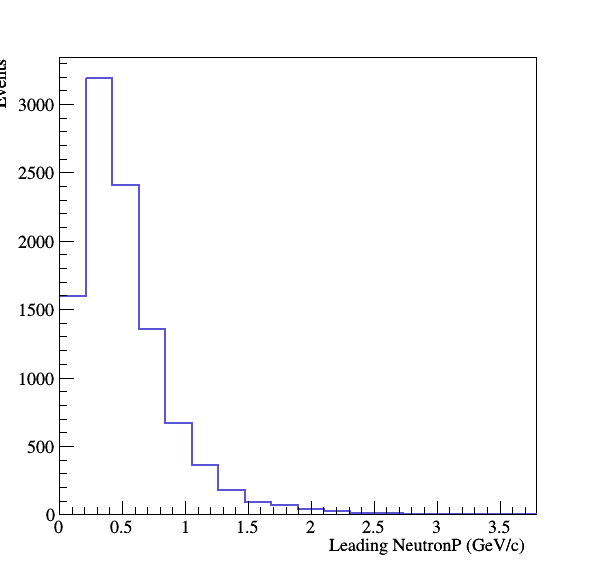

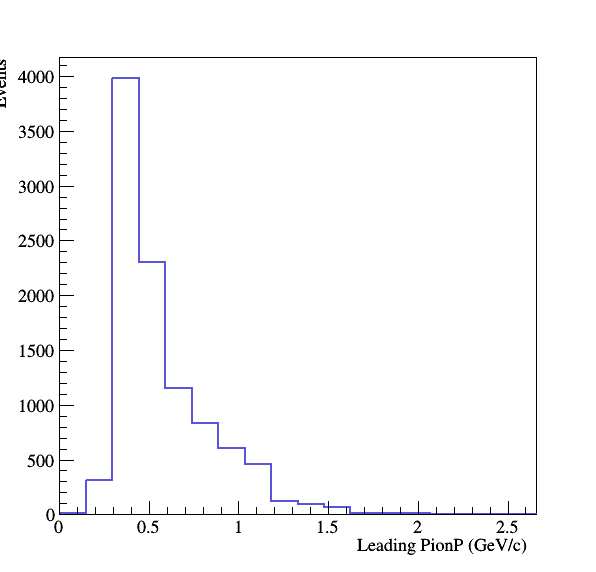

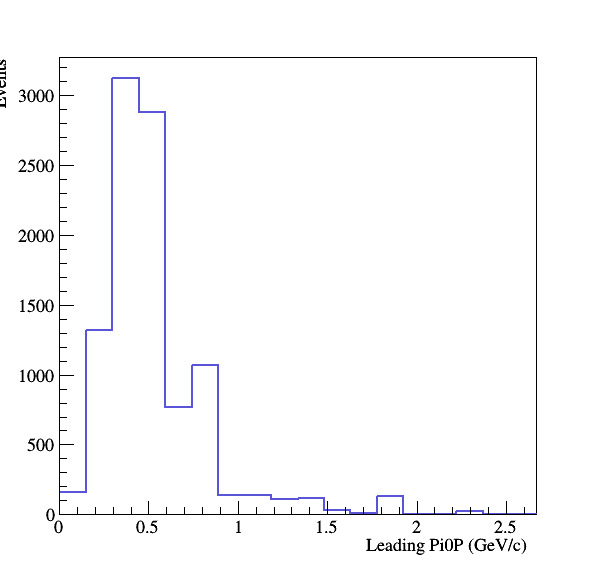

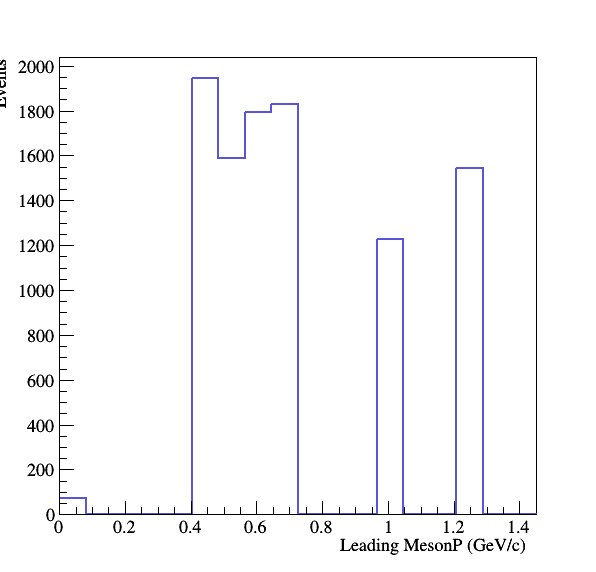

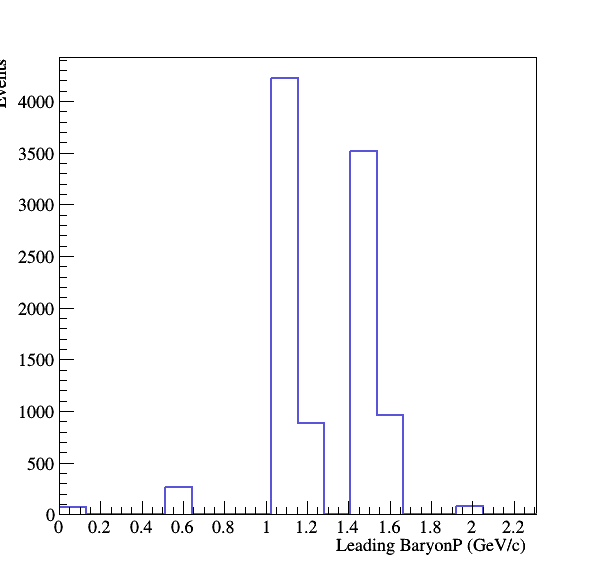

In [5]:
for i in particles:
    hN_P[i] = ROOT.TH1F("%sP" % i, "", 18, 0, max(max_particle_P[i])*1.2)
    
    hN_P[i].GetXaxis().SetTitle("Leading %sP (GeV/c)" % i)
    hN_P[i].GetYaxis().SetTitle("Events")
    
    hN_P[i].SetLineColor(9)
    hN_P[i].SetLineWidth(2)
    hN_P[i].GetXaxis().SetTitleFont(132)
    hN_P[i].GetXaxis().SetLabelFont(132)
    hN_P[i].GetYaxis().SetTitleFont(132)
    hN_P[i].GetYaxis().SetLabelFont(132)
    
    cN_P[i] = ROOT.TCanvas("%sP" % i, "Leading %s P" % i, 600, 600)
    
    cN_P[i].Draw()
    hN_P[i].Draw()
    
    for j in max_particle_P[i]:
        hN_P[i].Fill(j)

Now I want to graph the leading energies of the different particle types.

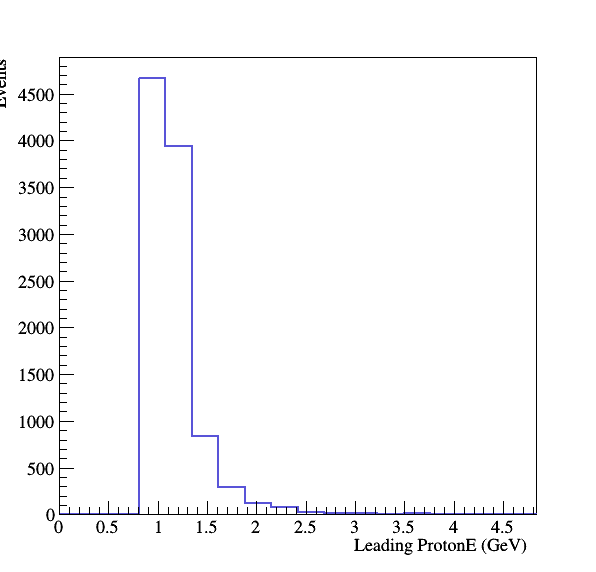

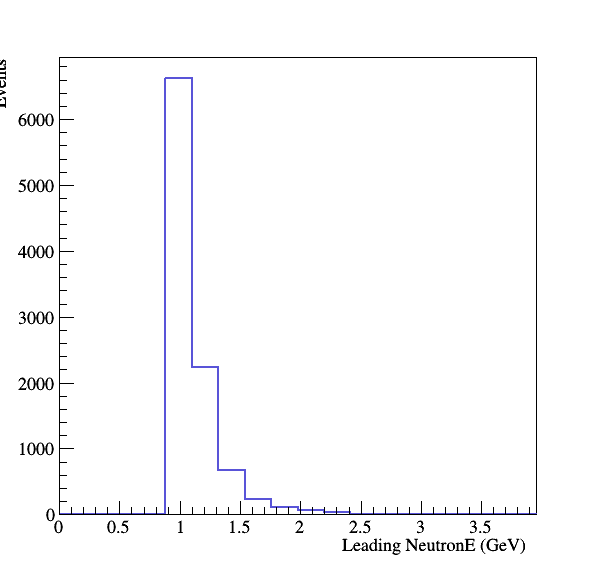

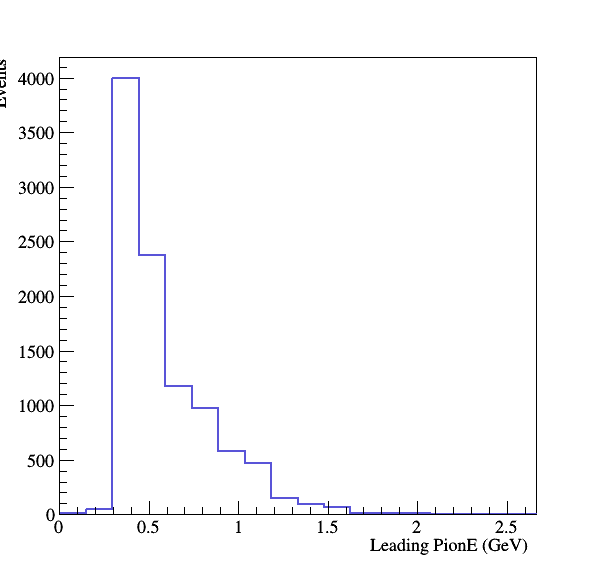

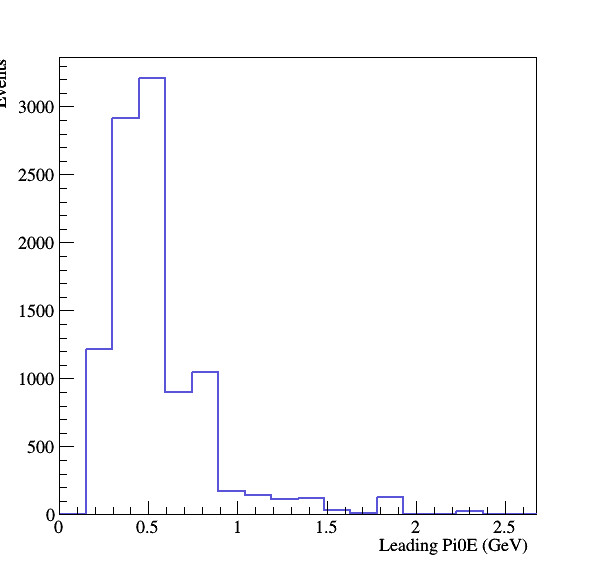

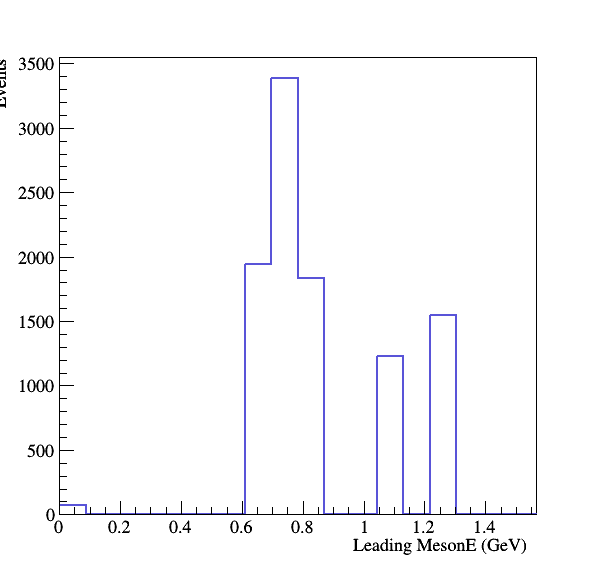

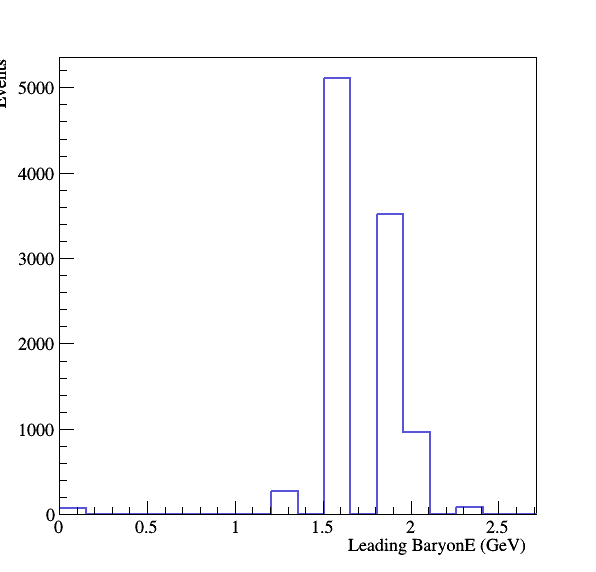

In [6]:
for i in particles:
    hN_E[i] = ROOT.TH1F("%sE" % i, "", 18, 0, max(max_particle_E[i])*1.2)
    
    hN_E[i].GetXaxis().SetTitle("Leading %sE (GeV)" % i)
    hN_E[i].GetYaxis().SetTitle("Events")
    
    hN_E[i].SetLineColor(9)
    hN_E[i].SetLineWidth(2)
    hN_E[i].GetXaxis().SetTitleFont(132)
    hN_E[i].GetXaxis().SetLabelFont(132)
    hN_E[i].GetYaxis().SetTitleFont(132)
    hN_E[i].GetYaxis().SetLabelFont(132)
    
    cN_E[i] = ROOT.TCanvas("%sE" % i, "Leading %s E" % i, 600, 600)
    
    cN_E[i].Draw()
    hN_E[i].Draw()
    
    for j in max_particle_E[i]:
        hN_E[i].Fill(j)

Now I want to graph the histograms showing the overall leading momenta moduli and energies for all particle types within a single event.

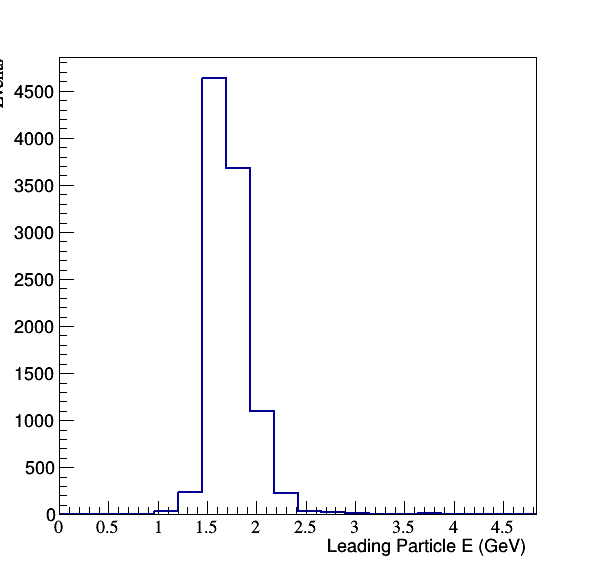

In [7]:
h_E = ROOT.TH1F("LeadingE", "", 20, 0, max(max_overall_E)*1.2)
c_E = ROOT.TCanvas("LeadingE", "Leading Particle E", 600, 600)

h_E.GetXaxis().SetTitle("Leading Particle E (GeV)")
h_E.GetYaxis().SetTitle("Events")
h_E.SetLineWidth(2)
h_E.GetXaxis().SetLabelFont(132)
h_E.GetYaxis().SetTitleFont(132)

c_E.Draw()
h_E.Draw()

for i in max_overall_E:
    h_E.Fill(i)

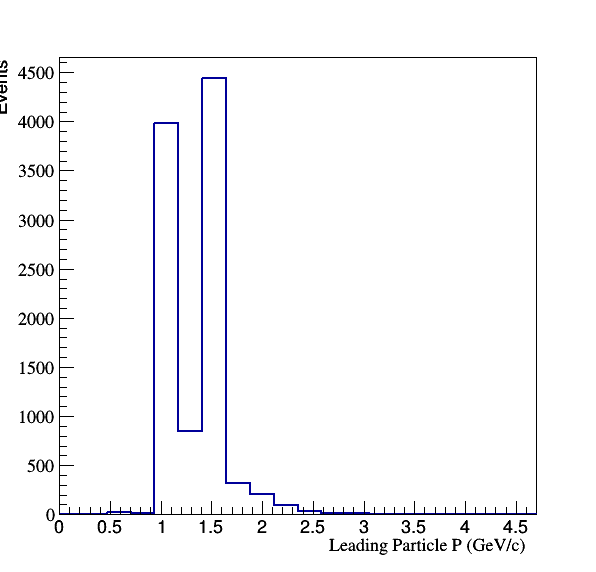

In [8]:
h_P = ROOT.TH1F("LeadingP", "", 20, 0, max(max_overall_P)*1.2)
c_P = ROOT.TCanvas("LeadingP", "Leading Particle P", 600, 600)

h_P.GetXaxis().SetTitle("Leading Particle P (GeV/c)")
h_P.GetYaxis().SetTitle("Events")
h_P.SetLineWidth(2)
h_P.GetXaxis().SetTitleFont(132)
h_P.GetYaxis().SetLabelFont(132)

c_P.Draw()
h_P.Draw()

for i in max_overall_P:
    h_P.Fill(i)